## Linear Discriminant Analysis 실습

### 1. LDA

In [1]:
import numpy as np

- LDA를 위한 함수 불러오기

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [4]:
X = np.array([[-1,-1], [-2, -1], [-3, -2], [1,1], [2,1], [3,2]])
y = np.array([1,1,1,2,2,2])

- LDA 모델 구축

In [5]:
clf = LinearDiscriminantAnalysis()
clf.fit(X,y)

LinearDiscriminantAnalysis()

In [6]:
print(clf.predict([[-0.8,-1]]))

[1]


### 2. Quadratic Discriminant Analysis

- QDA를 위한 함수 불러오기

In [7]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

- QDA 모델 구축

In [9]:
clf2 = QuadraticDiscriminantAnalysis()
clf2.fit(X,y)

QuadraticDiscriminantAnalysis()

In [10]:
print(clf2.predict([[-0.8, -1]]))

[1]


- LDA, QDA 비교

In [11]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[3, 0],
       [0, 3]], dtype=int64)

In [13]:
y_pred2 = clf2.predict(X)
confusion_matrix(y, y_pred2)

array([[3, 0],
       [0, 3]], dtype=int64)

### 3. LDA, QDA의 시각적 비교

In [15]:
from sklearn.datasets import make_moons, make_circles, make_classification
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

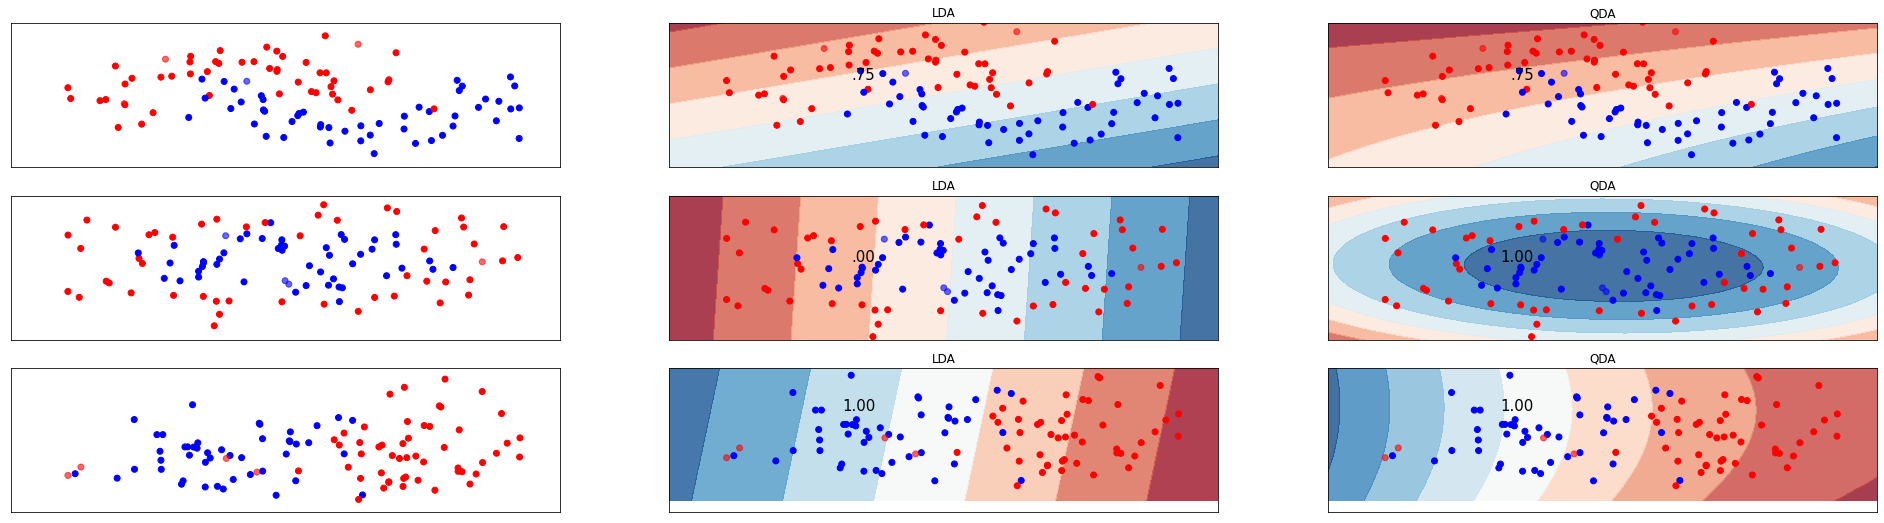

In [21]:
h=0.2
names = ["LDA", "QDA"]
classifiers = [
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X,y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =4)
    
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i +=1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    
        # Plot also the training points
        ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:,0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(xx.min(), xx.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - 3, yy.min() + 3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()